In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [ ]:
import numpy as np
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling1D, Dense

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Lemma'])
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


embedding_dim = 100
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



max_seq_length = 1000
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_seq_length, trainable=False))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x = tokenizer.texts_to_sequences(df['Lemma'])
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [ ]:
import tensorflow as tf
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_seq_length, padding='post', truncating='post')
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_seq_length, padding='post', truncating='post')


In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
2788/2788 [==============================] - 35s 12ms/step - loss: 0.6586 - accuracy: 0.5597 - val_loss: 0.6513 - val_accuracy: 0.5734
Epoch 2/50
2788/2788 [==============================] - 35s 13ms/step - loss: 0.6483 - accuracy: 0.5680 - val_loss: 0.6498 - val_accuracy: 0.5663
Epoch 3/50
2788/2788 [==============================] - 34s 12ms/step - loss: 0.6449 - accuracy: 0.5769 - val_loss: 0.6423 - val_accuracy: 0.5785
Epoch 4/50
2788/2788 [==============================] - 34s 12ms/step - loss: 0.6429 - accuracy: 0.5782 - val_loss: 0.6425 - val_accuracy: 0.5777
Epoch 5/50
2788/2788 [==============================] - 34s 12ms/step - loss: 0.6410 - accuracy: 0.5805 - val_loss: 0.6420 - val_accuracy: 0.5823
Epoch 6/50
2788/2788 [==============================] - 32s 12ms/step - loss: 0.6396 - accuracy: 0.5823 - val_loss: 0.6457 - val_accuracy: 0.5667
Epoch 7/50
2788/2788 [==============================] - 34s 12ms/step - loss: 0.6379 - accuracy: 0.5830 - val_loss: 0.6389 -

In [ ]:
model2=model.predict(x_test)

1195/1195 [==============================] - 9s 8ms/step


In [ ]:
y_pred = np.where(model2 >= 0.5, 1, 0)

In [ ]:
from sklearn.metrics import classification_report
y_pred_labels = np.argmax(y_pred, axis=1)
target_names = ['False', 'True']
print(classification_report(y_test, y_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

       False       0.46      1.00      0.63     17492
        True       0.00      0.00      0.00     20734

    accuracy                           0.46     38226
   macro avg       0.23      0.50      0.31     38226
weighted avg       0.21      0.46      0.29     38226



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model, classes=['FALSE', 'TRUE'])
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

YellowbrickTypeError: ignored

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(y_test, y_pred_labels, target_names=['False', 'True'])
print(report)

              precision    recall  f1-score   support

       False       0.46      1.00      0.63     17492
        True       0.00      0.00      0.00     20734

    accuracy                           0.46     38226
   macro avg       0.23      0.50      0.31     38226
weighted avg       0.21      0.46      0.29     38226



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


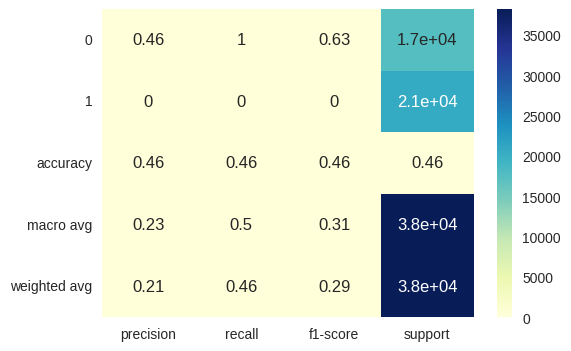

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred_labels, output_dict=True)).T, annot=True, cmap='YlGnBu')
plt.show()

1195/1195 [==============================] - 8s 7ms/step


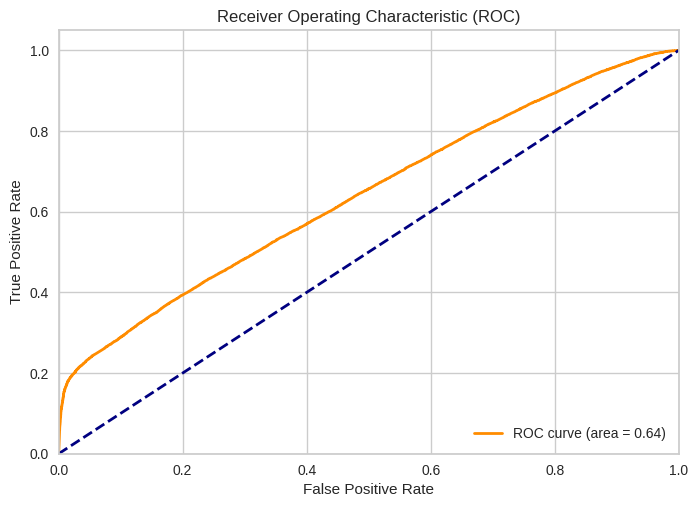

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probas = model.predict(x_test)


fpr, tpr, thresholds = roc_curve(y_test, probas)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a figure and subplot for loss curve
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Create a figure and subplot for accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


NameError: ignored